<a href="https://colab.research.google.com/github/sergiomath/dataScience/blob/main/Descriptivo_Base_Diaetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
##Importamos desde github
df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observe que no faltan valores en el conjunto de datos, sin embargo, las características como glucosa, presión arterial, insulina, grosor de la piel tienen 0 valores, lo que no es posible. Tenemos que reemplazar los valores 0 con valores de la **media  o mediana** de una columna específica

In [6]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean()) ##Remmplazamos los 0 en glucosa por la media 
df.Glucose.value_counts()## contamos de nuevo

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

In [15]:
df[df['BloodPressure'] == 0]['BloodPressure'].value_counts() ##contamos los ceros en la presion sanguinea
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean()) ##reemplazamos con la media

In [18]:
df[df['BMI'] == 0]['BMI'].value_counts()


Series([], Name: BMI, dtype: int64)

In [19]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [20]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Análisis Descriptivo

In [22]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.6,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.6,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.3,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.6,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.0,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.3,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,23,30.5,32.0,0.232,54,1


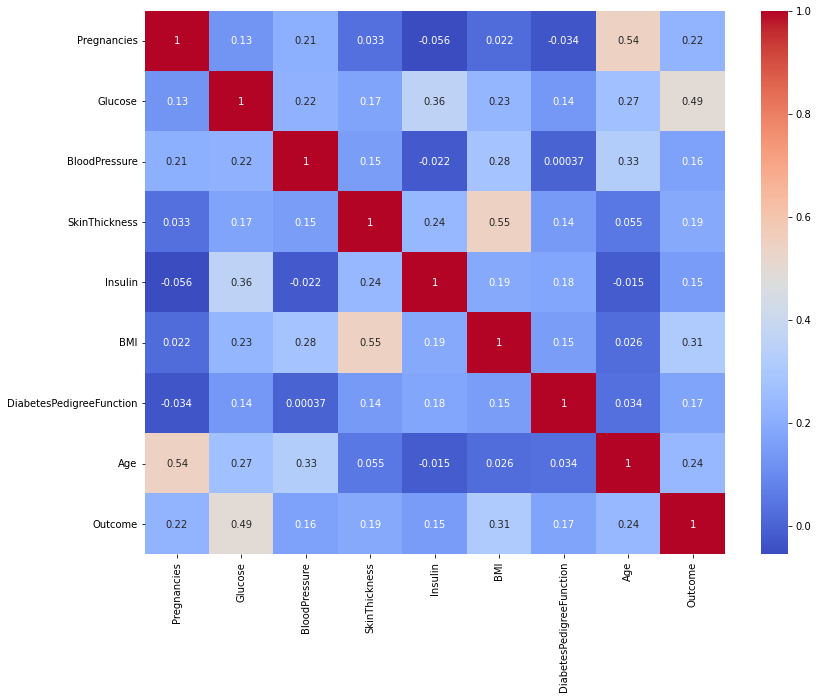

In [33]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, cmap = "coolwarm")
##annot entrega los datos sobre cada cuadro

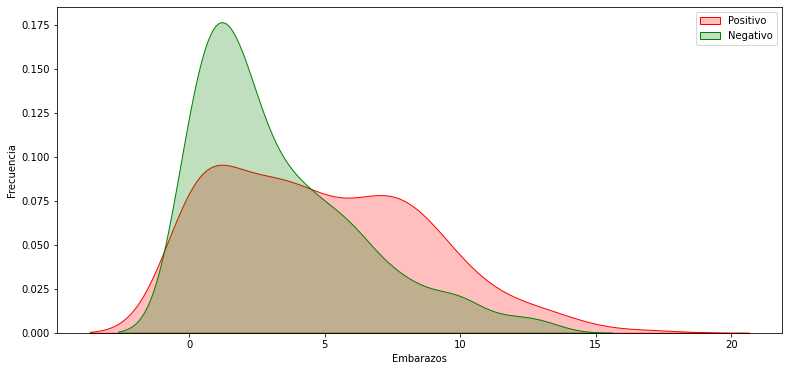

In [35]:
##Pregnancie Vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Embarazos")
g.set_ylabel("Frecuencia")
g.legend(["Positivo","Negativo"])